This notebook demonstrates how to use the RV class for analyzing radial velocity (RV) data. 
We'll load sample data, visualize it, and perform some analysis including periodograms, 
removing trends, and fitting a sine curve.

In [1]:
#Make sure to import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
import seaborn as sns

# Import the RV class (assuming it's in the same directory or in your path)
from RV_analyser import RV 

Let's read in the data for the HD 027442 system. Make sure that the data file is in the correct format where column 1 = time epochs, column 2 = RV points and column 3 = RV uncertainty. 

In [2]:
data = [np.loadtxt('example_data.txt')]

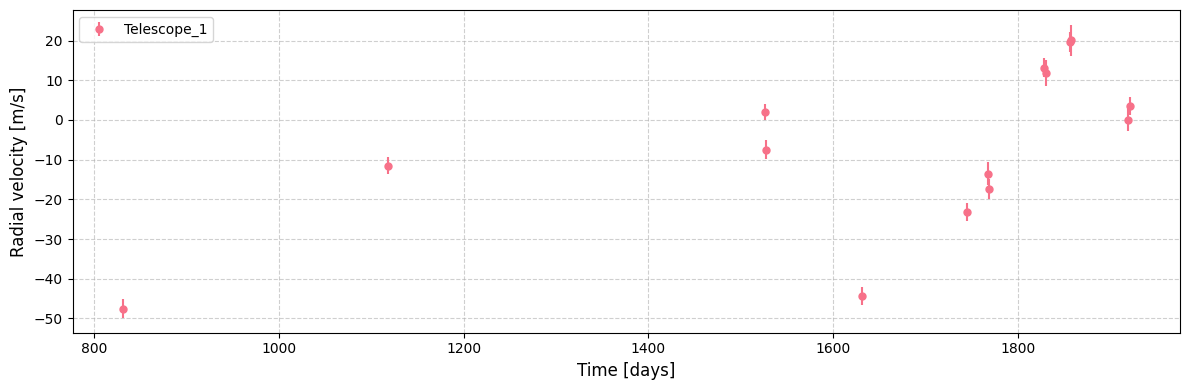

In [3]:
# Create an RV object with the simulated data
rv_analysis = RV(data, telescope_names=['Telescope_1'])

# Plot the raw data to see what it looks like
rv_analysis.plot_data()


There is an RV offset. We can fix this by subtracting the weighted mean 

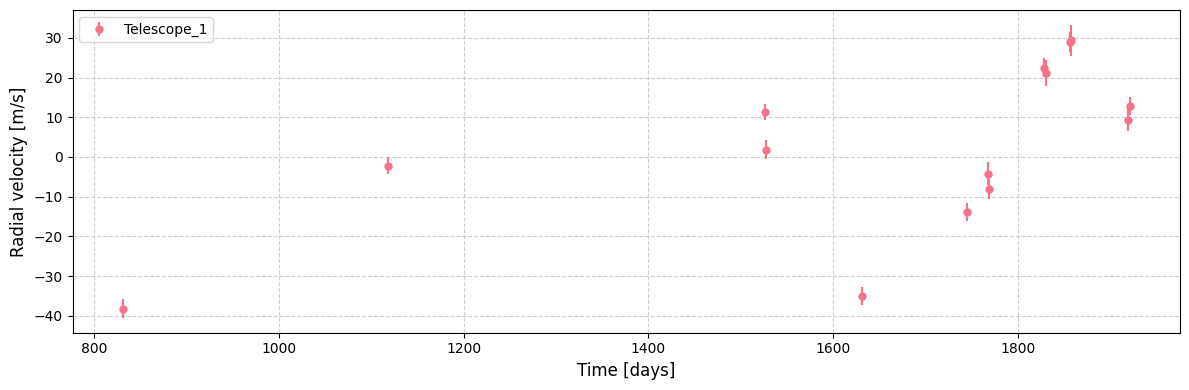

In [4]:
rv_analysis.remove_weighted_mean()
rv_analysis.plot_data()

You can see that the points are now centered around RV = 0 m/s. Next let's see what periodic signals a lomb-scargle periodogram reveals.

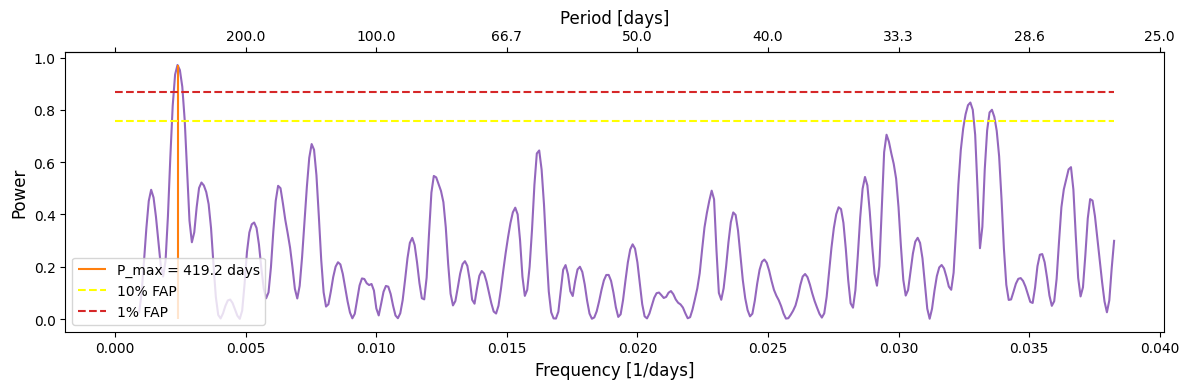

In [5]:
rv_analysis.periodogram()

We can see a signal corresponding to ~420 days that crosses the 1% FAP limit. Now let's phase fold this period and see if we can model the signal as a sinusoidal signal.

419.23934615384627
Fitted parameters: A = 29.153 +/- 3.243, phi = -1.236 +/- 0.095


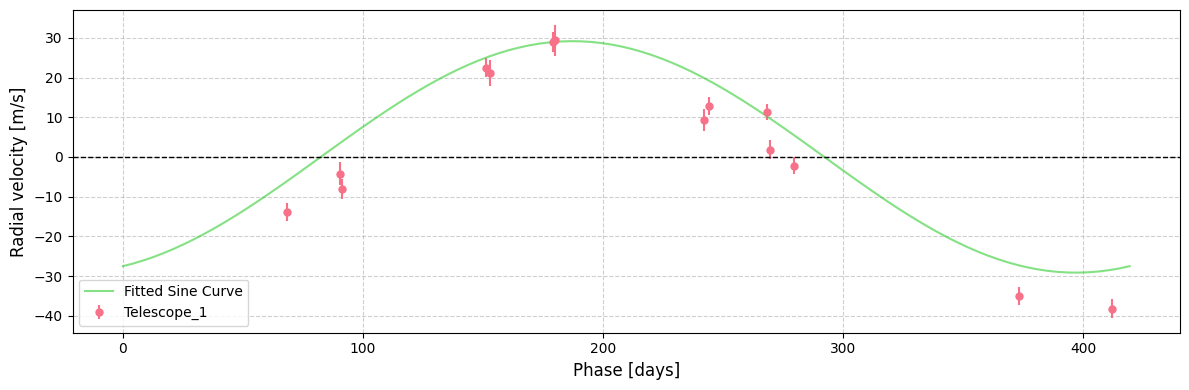

In [6]:
rv_analysis.sine()

Looks like a clean fit! Note: A is the fitted amplitude and phi is the fitted phase offset. 

Using the amplitude of this signal one can show that this corresponds to a $1.5$ jupiter mass planet orbiting the star!